In [1]:
import pandas as pd

In [4]:
social_explorer_data = pd.read_excel('./Assignment 3 Data/social_explorer_data_v2_cleanup.xlsx')
social_explorer_data.head()

,Geo_FIPS,White Alone,Black or African American Alone,Asian Alone,Other Race,Pop 25 Over: HS or Less Hs,Pop 25 Over: Some College and Bach,Pop 25 Over Grad School,Median Household Income 2017
0,36005000200,2665,1233,158,1002,2054,1227,157,62773
1,36005000400,2616,1962,54,1312,1411,2255,514,82697
2,36005001600,2685,2320,11,1099,2232,1113,188,33118
3,36005001900,519,1054,78,1166,867,835,135,40117
4,36005002000,3344,4500,104,1660,4102,1432,164,18370


In [13]:
unique_complaints = pd.read_excel('./Assignment 3 Data/complaint_per_tract_2018_final.xlsx')
unique_complaints.drop(['geometry', 'complaints'], axis=1, inplace=True)
unique_complaints.head()

,Geo_FIPS,unique_complaints
0,36061026100,1432
1,36061027900,1523
2,36061029100,1526
3,36061028300,985
4,36005018900,1358


In [16]:
demo_complaints = pd.merge(social_explorer_data, unique_complaints, on='Geo_FIPS', how='inner')
demo_complaints.columns

Index([u'Geo_FIPS', u'White Alone', u'Black or African American Alone',
       u'Asian Alone', u'Other Race', u'Pop 25 Over: HS or Less Hs',
       u'Pop 25 Over: Some College and Bach', u'Pop 25 Over Grad School',
       u'Median Household Income 2017', u'unique_complaints'],
      dtype='object')

In [38]:
X = demo_complaints[[ u'White Alone', u'Black or African American Alone',
       u'Asian Alone', u'Other Race', u'Pop 25 Over: HS or Less Hs',
       u'Pop 25 Over: Some College and Bach', u'Pop 25 Over Grad School',
       u'Median Household Income 2017']]
Y = demo_complaints.unique_complaints

### Correlation Matrix 

In [39]:
demo_complaints.iloc[:,1:].corr()

,White Alone,Black or African American Alone,Asian Alone,Other Race,Pop 25 Over: HS or Less Hs,Pop 25 Over: Some College and Bach,Pop 25 Over Grad School,Median Household Income 2017,unique_complaints
White Alone,1.000000,-0.331242,0.157203,-0.047330,0.066174,0.701184,0.760046,0.397048,0.011555
Black or African American Alone,-0.331242,1.000000,-0.273023,0.216992,0.413187,0.199051,-0.121348,-0.319301,0.323070
Asian Alone,0.157203,-0.273023,1.000000,-0.004107,0.318734,0.291962,0.182381,0.011483,0.025780
Other Race,-0.047330,0.216992,-0.004107,1.000000,0.699444,0.226911,-0.082184,-0.394979,0.691923
Pop 25 Over: HS or Less Hs,0.066174,0.413187,0.318734,0.699444,1.000000,0.351096,-0.136160,-0.500571,0.614530
Pop 25 Over: Some College and Bach,0.701184,0.199051,0.291962,0.226911,0.351096,1.000000,0.739550,0.234146,0.305142
Pop 25 Over Grad School,0.760046,-0.121348,0.182381,-0.082184,-0.136160,0.739550,1.000000,0.549540,-0.016483
Median Household Income 2017,0.397048,-0.319301,0.011483,-0.394979,-0.500571,0.234146,0.549540,1.000000,-0.347497
unique_complaints,0.011555,0.323070,0.025780,0.691923,0.614530,0.305142,-0.016483,-0.347497,1.000000


### Correlation Matrix of Dependent Variables

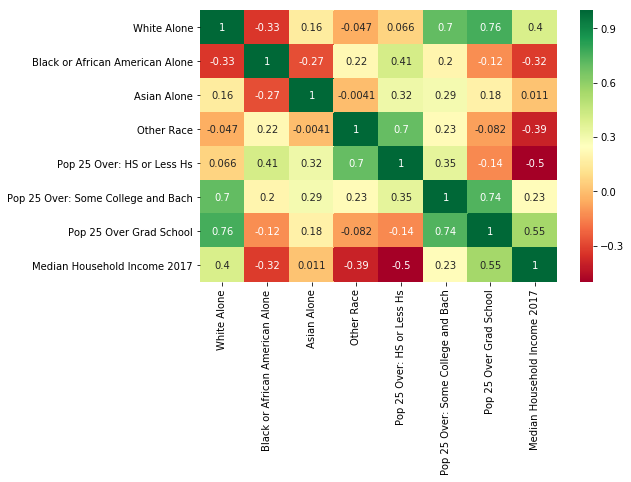

In [40]:
import seaborn as sns
# X = scaled_census_ca[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### We know that the R score of a univariant regression is the same as the correlation coefficient

In [41]:
import statsmodels.api as sm

### Performing a univariant linear regressions 

In [57]:
 X = demo_complaints[[ u'White Alone', u'Black or African American Alone',
       u'Asian Alone', u'Other Race', u'Pop 25 Over: HS or Less Hs',
       u'Pop 25 Over: Some College and Bach', u'Pop 25 Over Grad School',
       u'Median Household Income 2017']]
for col in X.columns:   
    X = sm.add_constant(X)
    model = sm.OLS(Y,X.loc[:,col])
    results = model.fit()
    print('Feature : {}\n\n'.format(col))
    print(results.summary2())
    print('\n\n')

Feature : White Alone


                   Results: Ordinary least squares
Model:              OLS               Adj. R-squared:     0.316     
Dependent Variable: unique_complaints AIC:                28311.5533
Date:               2019-05-02 15:52  BIC:                28317.2049
No. Observations:   2104              Log-Likelihood:     -14155.   
Df Model:           1                 F-statistic:        972.9     
Df Residuals:       2103              Prob (F-statistic): 7.04e-176 
R-squared:          0.316             Scale:              40852.    
----------------------------------------------------------------------
                Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
----------------------------------------------------------------------
White Alone     0.0574     0.0018   31.1919   0.0000   0.0537   0.0610
--------------------------------------------------------------------
Omnibus:              622.585       Durbin-Watson:          1.029   
Prob(Omnibus):      

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:      0.347     
Dependent Variable:    unique_complaints  AIC:                 28215.4147
Date:                  2019-05-02 15:52   BIC:                 28221.0663
No. Observations:      2104               Log-Likelihood:      -14107.   
Df Model:              1                  F-statistic:         1117.     
Df Residuals:          2103               Prob (F-statistic):  9.15e-197 
R-squared:             0.347              Scale:               39027.    
-------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
-------------------------------------------------------------------------
Median Household Income 2017 0.0020   0.0001 33.4177 0.0000 0.0019 0.0021
-------------------------------------------------------------------------
Omnibus:               849.492         Durbin-Watson:      

### Performing a multivariate linear regression to understand total impact

In [19]:
model = sm.OLS(Y,X)
results = model.fit()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      unique_complaints   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1080.
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        15:17:16   Log-Likelihood:                -12836.
No. Observations:                2104   AIC:                         2.569e+04
Df Residuals:                    2096   BIC:                         2.573e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
White Alone                           -0.0052      0.006     -0.946      0.344      -0.016       0.006
Black or African American Alone        0.0084      0.006      1.490      0.136      -0.003       0.019
Asian Alone                           -0.0121      0.007     -1.674      0.094      -0.026       0.002
Other Race                             0.0764      0.006     12.603      0.000       0.065       0.088
Pop 25 Over: HS or Less Hs             0.0520      0.011      4.914      0.000       0.031       0.073
Pop 25 Over: Some College and Bach     0.0425      0.009      4.898      0.000       0.025       0.059
Pop 25 Over Grad School               -0.0134      0.011     -1.250      0.212      -0.035       0.008
Median Household Income 2017           0.0004   5.86e-05      6.303      0.000       0.000       0.000
==============================================================================
Omnibus:                      585.945   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49999.827
Skew:                           0.235   Prob(JB):                         0.00
Kurtosis:                      26.877   Cond. No.                         544.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### For this model I did not use an intercept

###  THe R-square of the model is 80.5% 

### From this analysis we can understand that not all regressors are statistically significant, viz. Few coefficients have p-value of > 0.05

### The coeffcients that are not significant are:
1. White ALone
2. Black or African American ALone
3. Asian Alone
4. Grad School